import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the W cohort data
w_df = pd.read_csv('C:\Users\yashodad\Downloads\LD 2025\Yashoda\W LD Data 10.31 All_processed.csv')

print("W Cohort Data Shape:", w_df.shape)
print("\nUnique Animals:", w_df['Animal ID'].nunique())
print("Unique Schedule Names:", w_df['Schedule name'].unique())
print("\nGenotypes:", w_df['Genotype'].unique())


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the W cohort data
w_df = pd.read_csv('C:/Users/yashodad/Downloads/LD 2025/Yashoda/W LD Data 10.31 All_processed.csv')

print("W Cohort Data Shape:", w_df.shape)
print("\nUnique Animals:", w_df['Animal ID'].nunique())
print("Unique Schedule Names:", w_df['Schedule name'].unique())
print("\nGenotypes:", w_df['Genotype'].unique())


W Cohort Data Shape: (646, 158)

Unique Animals: 20
Unique Schedule Names: ['A_Mouse LD Punish Incorrect Training v2' 'A_Mouse LD 1 choice v2'
 'A_Mouse LD 1 choice reversal v3'
 'A_Mouse Pairwise Punish Incorrect Training v3'
 'A_Mouse Pairwise Discrimination v3'
 'A_Mouse Pairwise Discrimination v3 - Reversal']

Genotypes: ['+' '-' nan]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the W cohort data
w_df = pd.read_csv('C:/Users/yashodad/Downloads/LD 2025/Yashoda/W LD Data 10.31 All_processed.csv')

print("W Cohort Data Shape:", w_df.shape)
print("\nColumn names in original data:")
print(w_df.columns.tolist()[:20])  # Show first 20 columns

print("\nUnique Animals:", w_df['Animal ID'].nunique())
print("Animal IDs:", w_df['Animal ID'].unique())

# Check what schedule names we have
print("\nAll Schedule Names in data:")
print(w_df['Schedule name'].unique())

# Let's check if our filter is working
relevant_schedules = ['Punish Incorrect', 'LD', 'LD reversal', 'LD Reversal']
w_df_filtered = w_df[w_df['Schedule name'].isin(relevant_schedules)]
print(f"\nAfter filtering, we have {len(w_df_filtered)} sessions")

if len(w_df_filtered) == 0:
    print("WARNING: No matching schedules found!")
    print("Let's see what schedule names contain 'LD' or 'Punish':")
    print(w_df[w_df['Schedule name'].str.contains('LD|Punish', case=False, na=False)]['Schedule name'].unique())

W Cohort Data Shape: (646, 158)

Column names in original data:
['Schedule name', 'Environment name', 'Schedule run date', 'Animal ID', 'End Summary - Condition (1)', 'End Summary - Trials Completed (1)', 'End Summary - No Correction Trials (1)', 'End Summary - % Correct (1)', 'End Summary - Left ITI Touches (1)', 'End Summary - Right ITI Touches (1)', 'Single Trial Result - Condition (1)', 'Single Trial Result - Condition (2)', 'Single Trial Result - Condition (3)', 'Single Trial Result - Condition (4)', 'Single Trial Result - Condition (5)', 'Single Trial Result - Condition (6)', 'Single Trial Result - Condition (7)', 'Single Trial Result - Condition (8)', 'Single Trial Result - Condition (9)', 'Single Trial Result - Condition (10)']

Unique Animals: 20
Animal IDs: ['c1m1' 'c1m2' 'c1m3' 'c1m4' 'c2m1' 'c2m2' 'c2m3' 'c2m4' 'c2m5' 'c3m1'
 'c3m2' 'c3m3' 'c3m4' 'c3m5' 'c4m1' 'c4m2' 'c4m3' 'c4m3 (2 i.e.)' 'c4m4'
 'c4m5']

All Schedule Names in data:
['A_Mouse LD Punish Incorrect Training v

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the W cohort data
w_df = pd.read_csv('C:/Users/yashodad/Downloads/LD 2025/Yashoda/W LD Data 10.31 All_processed.csv')

print("W Cohort Data Shape:", w_df.shape)
print("\nUnique Animals:", w_df['Animal ID'].nunique())

# Use the actual schedule names from your data
relevant_schedules = [
    'A_Mouse LD Punish Incorrect Training v2',  # PI for LD
    'A_Mouse LD 1 choice v2',                    # LD task
    'A_Mouse LD 1 choice reversal v3'            # LD reversal
]

w_df_filtered = w_df[w_df['Schedule name'].isin(relevant_schedules)]

print(f"\nFiltered to {len(w_df_filtered)} sessions with PI, LD, and LD reversal")
print("Schedule distribution:")
print(w_df_filtered['Schedule name'].value_counts())

def restructure_to_trial_format(df):
    """Convert session-level data to trial-by-trial format"""

    trial_data = []

    for idx, row in df.iterrows():
        animal_id = row['Animal ID']
        session_date = row['Schedule run date']
        schedule_name = row['Schedule name']

        # Determine task type and if it's reversal
        if 'reversal' in schedule_name.lower():
            is_reversal = True
            task_type = 'LD_reversal'
        elif 'LD 1 choice' in schedule_name:
            is_reversal = False
            task_type = 'LD'
        elif 'Punish Incorrect' in schedule_name and 'LD' in schedule_name:
            is_reversal = False
            task_type = 'PI'
        else:
            is_reversal = False
            task_type = 'Unknown'

        # Extract individual trial results
        for trial_num in range(1, 31):  # 30 trials per session
            trial_result_col = f'Single Trial Result - Trial Percent Correct ({trial_num})'

            if trial_result_col in df.columns:
                trial_result = row[trial_result_col]

                # Skip if no data for this trial
                if pd.isna(trial_result):
                    continue

                # Determine correctness and sides
                correct = 1 if trial_result == 100 else 0

                # For PI/LD: correct=left, incorrect=right
                # For LD reversal: correct=right, incorrect=left
                if not is_reversal:
                    chosen_side = 'left' if correct else 'right'
                    correct_side = 'left'
                else:
                    chosen_side = 'right' if correct else 'left'
                    correct_side = 'right'

                # Get latency for this trial
                if correct:
                    latency_col = f'Correct touch latency detail ({trial_num})'
                    latency = row[latency_col] if latency_col in df.columns else np.nan
                else:
                    latency_col = f'Blank Touch Latency detail ({trial_num})'
                    latency = row[latency_col] if latency_col in df.columns else np.nan

                trial_data.append({
                    'animal_id': animal_id,
                    'session_date': session_date,
                    'schedule_name': schedule_name,
                    'task_type': task_type,
                    'is_reversal': is_reversal,
                    'trial_num': trial_num,
                    'correct': correct,
                    'chosen_side': chosen_side,
                    'correct_side': correct_side,
                    'latency': latency,
                    'session_percent_correct': row['End Summary - % Correct (1)'],
                    'left_iti_touches': row['End Summary - Left ITI Touches (1)'],
                    'right_iti_touches': row['End Summary - Right ITI Touches (1)'],
                    'genotype': row['Genotype'],
                    'sex': row['Sex'],
                    'day': row['Day']
                })

    return pd.DataFrame(trial_data)

# Convert to trial format
print("\nConverting to trial-by-trial format...")
trial_df = restructure_to_trial_format(w_df_filtered)

print(f"\nTrial data shape: {trial_df.shape}")
print(f"Total trials: {len(trial_df)}")

# Handle the duplicate mouse ID issue
# 'c4m3 (2 i.e.)' appears to be a duplicate - let's check
print("\nUnique animal IDs in trial data:")
print(trial_df['animal_id'].unique())

# Clean up the duplicate ID if needed
trial_df['animal_id'] = trial_df['animal_id'].replace('c4m3 (2 i.e.)', 'c4m3_2')

print(f"\nTrials per animal:")
trials_per_animal = trial_df.groupby('animal_id').size()
print(trials_per_animal.describe())
print("\nDetailed trials per animal:")
print(trials_per_animal.sort_values(ascending=False))

# Show genotype distribution
print("\nGenotypes in data:")
print(trial_df.groupby(['genotype', 'animal_id']).size().reset_index(name='n_trials'))

W Cohort Data Shape: (646, 158)

Unique Animals: 20

Filtered to 393 sessions with PI, LD, and LD reversal
Schedule distribution:
Schedule name
A_Mouse LD 1 choice reversal v3            197
A_Mouse LD Punish Incorrect Training v2    116
A_Mouse LD 1 choice v2                      80
Name: count, dtype: int64

Converting to trial-by-trial format...

Trial data shape: (11485, 16)
Total trials: 11485

Unique animal IDs in trial data:
['c1m1' 'c1m2' 'c1m3' 'c1m4' 'c2m1' 'c2m2' 'c2m3' 'c2m4' 'c2m5' 'c3m1'
 'c3m2' 'c3m3' 'c3m4' 'c3m5' 'c4m1' 'c4m2' 'c4m3' 'c4m4' 'c4m5']

Trials per animal:
count     19.000000
mean     604.473684
std      101.839944
min      226.000000
25%      588.000000
50%      619.000000
75%      650.000000
max      728.000000
dtype: float64

Detailed trials per animal:
animal_id
c1m3    728
c1m2    690
c2m4    688
c2m5    660
c2m2    660
c2m1    640
c1m4    630
c4m5    623
c3m2    621
c4m1    619
c4m3    615
c3m1    613
c3m3    593
c3m4    591
c2m3    585
c3m5    573
c4


Summary by task type:
                          correct                   latency
                             mean       std count      mean
task_type   is_reversal                                    
LD          False        0.707122  0.455179  2373       NaN
LD_reversal True         0.477116  0.499519  5812       NaN
PI          False        0.603333  0.489280  3300  8.216124


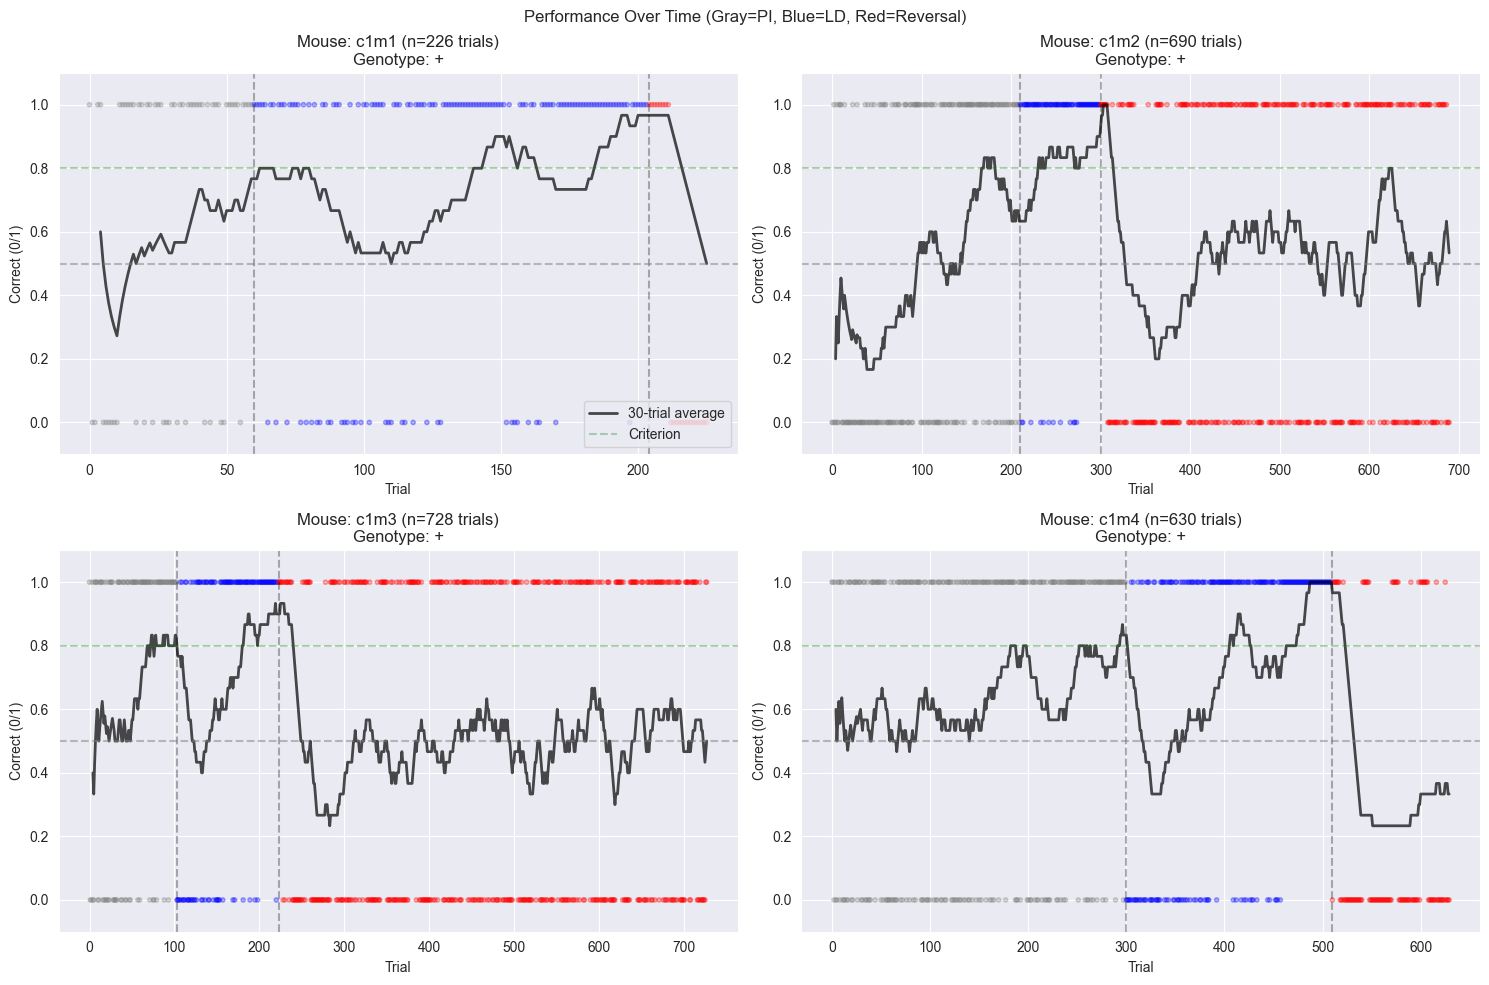


Data successfully processed and ready for GLM-HMM analysis!
Total animals: 19
Total trials: 11485
Average trials per animal: 604.5


In [5]:
# Create summary statistics
print("\nSummary by task type:")
summary = trial_df.groupby(['task_type', 'is_reversal']).agg({
    'correct': ['mean', 'std', 'count'],
    'latency': 'mean'
})
print(summary)

# Visualize performance across different tasks
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Select 4 representative mice
sample_mice = trial_df['animal_id'].unique()[:4]

for idx, mouse_id in enumerate(sample_mice):
    ax = axes[idx // 2, idx % 2]

    mouse_data = trial_df[trial_df['animal_id'] == mouse_id].copy()
    mouse_data = mouse_data.sort_values(['day', 'trial_num']).reset_index(drop=True)

    # Color by task type
    color_map = {'PI': 'gray', 'LD': 'blue', 'LD_reversal': 'red'}
    colors = [color_map.get(t, 'black') for t in mouse_data['task_type']]

    # Plot individual trials
    ax.scatter(range(len(mouse_data)), mouse_data['correct'],
               alpha=0.3, c=colors, s=10)

    # Add rolling mean
    window = 30
    rolling_mean = mouse_data['correct'].rolling(window=window, min_periods=5).mean()
    ax.plot(rolling_mean, 'k-', linewidth=2, alpha=0.7, label='30-trial average')

    # Mark task transitions
    task_changes = mouse_data['task_type'].ne(mouse_data['task_type'].shift()).cumsum()
    for i in task_changes.unique()[1:]:
        first_idx = mouse_data[task_changes == i].index[0]
        ax.axvline(x=first_idx, color='black', linestyle='--', alpha=0.3)

    ax.set_title(f'Mouse: {mouse_id} (n={len(mouse_data)} trials)\nGenotype: {mouse_data["genotype"].iloc[0]}')
    ax.set_ylabel('Correct (0/1)')
    ax.set_xlabel('Trial')
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax.axhline(y=0.8, color='green', linestyle='--', alpha=0.3, label='Criterion')
    ax.set_ylim(-0.1, 1.1)

    if idx == 0:
        ax.legend(loc='lower right')

plt.suptitle('Performance Over Time (Gray=PI, Blue=LD, Red=Reversal)')
plt.tight_layout()
plt.show()

print("\nData successfully processed and ready for GLM-HMM analysis!")
print(f"Total animals: {trial_df['animal_id'].nunique()}")
print(f"Total trials: {len(trial_df)}")
print(f"Average trials per animal: {len(trial_df) / trial_df['animal_id'].nunique():.1f}")

In [6]:
def create_glm_hmm_design_matrix(trial_df, animal_id):
    """
    Create design matrix for GLM-HMM following Ashwood et al. structure
    Inputs: stimulus, bias, previous choice, win-stay/lose-switch
    """

    # Get data for specific animal
    animal_data = trial_df[trial_df['animal_id'] == animal_id].copy()
    animal_data = animal_data.sort_values(['day', 'trial_num']).reset_index(drop=True)

    n_trials = len(animal_data)

    # X1: Stimulus (task context)
    # -1 for PI/LD (left correct), +1 for reversal (right correct)
    stimulus = np.where(animal_data['is_reversal'], 1, -1)

    # X2: Bias (constant term)
    bias = np.ones(n_trials)

    # X3: Previous choice (left = -1, right = +1)
    prev_choice = np.zeros(n_trials)
    prev_choice[1:] = np.where(animal_data['chosen_side'].iloc[:-1] == 'left', -1, 1)

    # X4: Win-stay/lose-switch (interaction of previous choice and reward)
    prev_reward = np.zeros(n_trials)
    prev_reward[1:] = animal_data['correct'].iloc[:-1].values
    win_stay_lose_switch = prev_choice * (2 * prev_reward - 1)

    # Stack into design matrix
    X = np.column_stack([stimulus, bias, prev_choice, win_stay_lose_switch])

    # Output: choices (left=0, right=1)
    y = np.where(animal_data['chosen_side'] == 'right', 1, 0)

    # Return additional metadata for analysis
    metadata = {
        'latency': animal_data['latency'].values,
        'correct': animal_data['correct'].values,
        'session_date': animal_data['session_date'].values,
        'task_type': animal_data['task_type'].values,
        'is_reversal': animal_data['is_reversal'].values,
        'trial_indices': animal_data.index.values
    }

    return X, y, metadata, animal_data

# Test on one animal
test_animal = trial_df['animal_id'].unique()[0]
X, y, metadata, animal_data = create_glm_hmm_design_matrix(trial_df, test_animal)

print(f"Design matrix for animal {test_animal}:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nFirst 10 trials:")
design_df = pd.DataFrame(X, columns=['stimulus', 'bias', 'prev_choice', 'win_stay_lose_switch'])
design_df['choice'] = y
design_df['correct'] = metadata['correct']
design_df['task_type'] = metadata['task_type']
print(design_df.head(10))

Design matrix for animal c1m1:
X shape: (226, 4)
y shape: (226,)

First 10 trials:
   stimulus  bias  prev_choice  win_stay_lose_switch  choice  correct  \
0      -1.0   1.0          0.0                  -0.0       0        1   
1      -1.0   1.0         -1.0                  -1.0       1        0   
2      -1.0   1.0          1.0                  -1.0       1        0   
3      -1.0   1.0          1.0                  -1.0       0        1   
4      -1.0   1.0         -1.0                  -1.0       0        1   
5      -1.0   1.0         -1.0                  -1.0       1        0   
6      -1.0   1.0          1.0                  -1.0       1        0   
7      -1.0   1.0          1.0                  -1.0       1        0   
8      -1.0   1.0          1.0                  -1.0       1        0   
9      -1.0   1.0          1.0                  -1.0       1        0   

  task_type  
0        PI  
1        PI  
2        PI  
3        PI  
4        PI  
5        PI  
6        PI  
7

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

class SimpleGLMHMM:
    """
    A simplified GLM-HMM implementation for binary choice data
    """

    def __init__(self, n_states=3, random_state=42):
        self.n_states = n_states
        self.random_state = random_state

        # Initialize parameters
        self.transition_matrix = None
        self.initial_probs = None
        self.glm_models = []

    def _initialize_states(self, X, y):
        """Initialize states using k-means clustering on the design matrix"""
        # Use k-means on the design matrix to get initial state assignments
        kmeans = KMeans(n_clusters=self.n_states, random_state=self.random_state, n_init=10)
        initial_states = kmeans.fit_predict(X)

        # Ensure each state has both choices (0 and 1)
        for state in range(self.n_states):
            state_mask = initial_states == state
            if np.sum(state_mask) > 0:
                y_state = y[state_mask]
                # If all same class, randomly flip some
                if len(np.unique(y_state)) == 1:
                    n_to_flip = max(2, int(0.2 * np.sum(state_mask)))
                    indices = np.where(state_mask)[0]
                    flip_indices = np.random.choice(indices, n_to_flip, replace=False)
                    # Assign these trials to a different state
                    initial_states[flip_indices] = (state + 1) % self.n_states

        return initial_states

    def fit(self, X, y, n_iter=50):
        """
        Fit GLM-HMM using EM algorithm

        Parameters:
        X: design matrix (n_trials, n_features)
        y: binary choices (n_trials,)
        """
        n_trials, n_features = X.shape

        # Better initialization
        states = self._initialize_states(X, y)

        log_likelihoods = []

        for iteration in range(n_iter):
            # M-step: Update GLM models for each state
            self.glm_models = []

            for state in range(self.n_states):
                state_mask = states == state
                n_state_trials = np.sum(state_mask)

                if n_state_trials > 10:
                    y_state = y[state_mask]
                    X_state = X[state_mask]

                    # Check if we have both classes
                    unique_classes = np.unique(y_state)
                    if len(unique_classes) == 2:
                        # Normal case - fit GLM
                        glm = LogisticRegression(
                            max_iter=1000,
                            random_state=self.random_state,
                            solver='lbfgs'
                        )
                        glm.fit(X_state, y_state)
                    else:
                        # Only one class - create a dummy model
                        glm = LogisticRegression(
                            max_iter=1000,
                            random_state=self.random_state,
                            solver='lbfgs'
                        )
                        # Add a small amount of the other class
                        y_augmented = np.concatenate([y_state, [1 - unique_classes[0]]])
                        X_augmented = np.vstack([X_state, X_state[0:1]])
                        glm.fit(X_augmented, y_augmented)

                        # Adjust weights to strongly favor the observed class
                        if unique_classes[0] == 1:
                            glm.intercept_[0] = 5  # Strong bias toward 1
                        else:
                            glm.intercept_[0] = -5  # Strong bias toward 0
                else:
                    # Not enough data - use all data
                    glm = LogisticRegression(
                        max_iter=1000,
                        random_state=self.random_state,
                        solver='lbfgs'
                    )
                    glm.fit(X, y)

                self.glm_models.append(glm)

            # E-step: Update state assignments
            log_probs = np.zeros((n_trials, self.n_states))

            for state in range(self.n_states):
                # Get probability of each observation given state
                probs = self.glm_models[state].predict_proba(X)
                # Handle edge cases
                probs = np.clip(probs, 1e-10, 1 - 1e-10)
                log_probs[:, state] = np.log(probs[range(n_trials), y.astype(int)])

            # Add small random noise to break ties
            log_probs += np.random.normal(0, 0.01, log_probs.shape)

            # Update states
            states = np.argmax(log_probs, axis=1)

            # Calculate log-likelihood
            ll = np.sum(np.max(log_probs, axis=1))
            log_likelihoods.append(ll)

            # Check convergence
            if iteration > 10 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < 0.1:
                print(f"Converged at iteration {iteration}")
                break

        # Calculate final posterior probabilities
        self.posterior_probs = np.exp(log_probs - logsumexp(log_probs, axis=1, keepdims=True))
        self.states = states
        self.log_likelihoods = log_likelihoods

        # Extract GLM weights safely
        self.weights = []
        self.intercepts = []
        for model in self.glm_models:
            if hasattr(model, 'coef_'):
                self.weights.append(model.coef_[0])
                self.intercepts.append(model.intercept_[0])
            else:
                self.weights.append(np.zeros(n_features))
                self.intercepts.append(0)

        self.weights = np.array(self.weights)
        self.intercepts = np.array(self.intercepts)

        return self

# Fit the model
print("Fitting simplified GLM-HMM...")

# Get data for one animal
test_animal = trial_df['animal_id'].unique()[0]
X, y, metadata, animal_data = create_glm_hmm_design_matrix(trial_df, test_animal)

print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"Unique choices: {np.unique(y)} (counts: {np.bincount(y)})")

# Fit model with 3 states
model = SimpleGLMHMM(n_states=3)
model.fit(X, y, n_iter=30)

print(f"Converged after {len(model.log_likelihoods)} iterations")
print(f"Final log-likelihood: {model.log_likelihoods[-1]:.2f}")

# Quick check of state assignments
print(f"\nState occupancies:")
for state in range(model.n_states):
    mask = model.states == state
    print(f"  State {state+1}: {np.sum(mask)} trials ({np.sum(mask)/len(model.states):.1%})")

Fitting simplified GLM-HMM...
Data shape: X=(226, 4), y=(226,)
Unique choices: [0 1] (counts: [162  64])
Converged at iteration 12
Converged after 13 iterations
Final log-likelihood: -0.66

State occupancies:
  State 1: 64 trials (28.3%)
  State 2: 49 trials (21.7%)
  State 3: 113 trials (50.0%)


C:\Users\yashodad\AppData\Local\Temp\ipykernel_36048\2759182233.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(latencies_by_state, labels=labels)


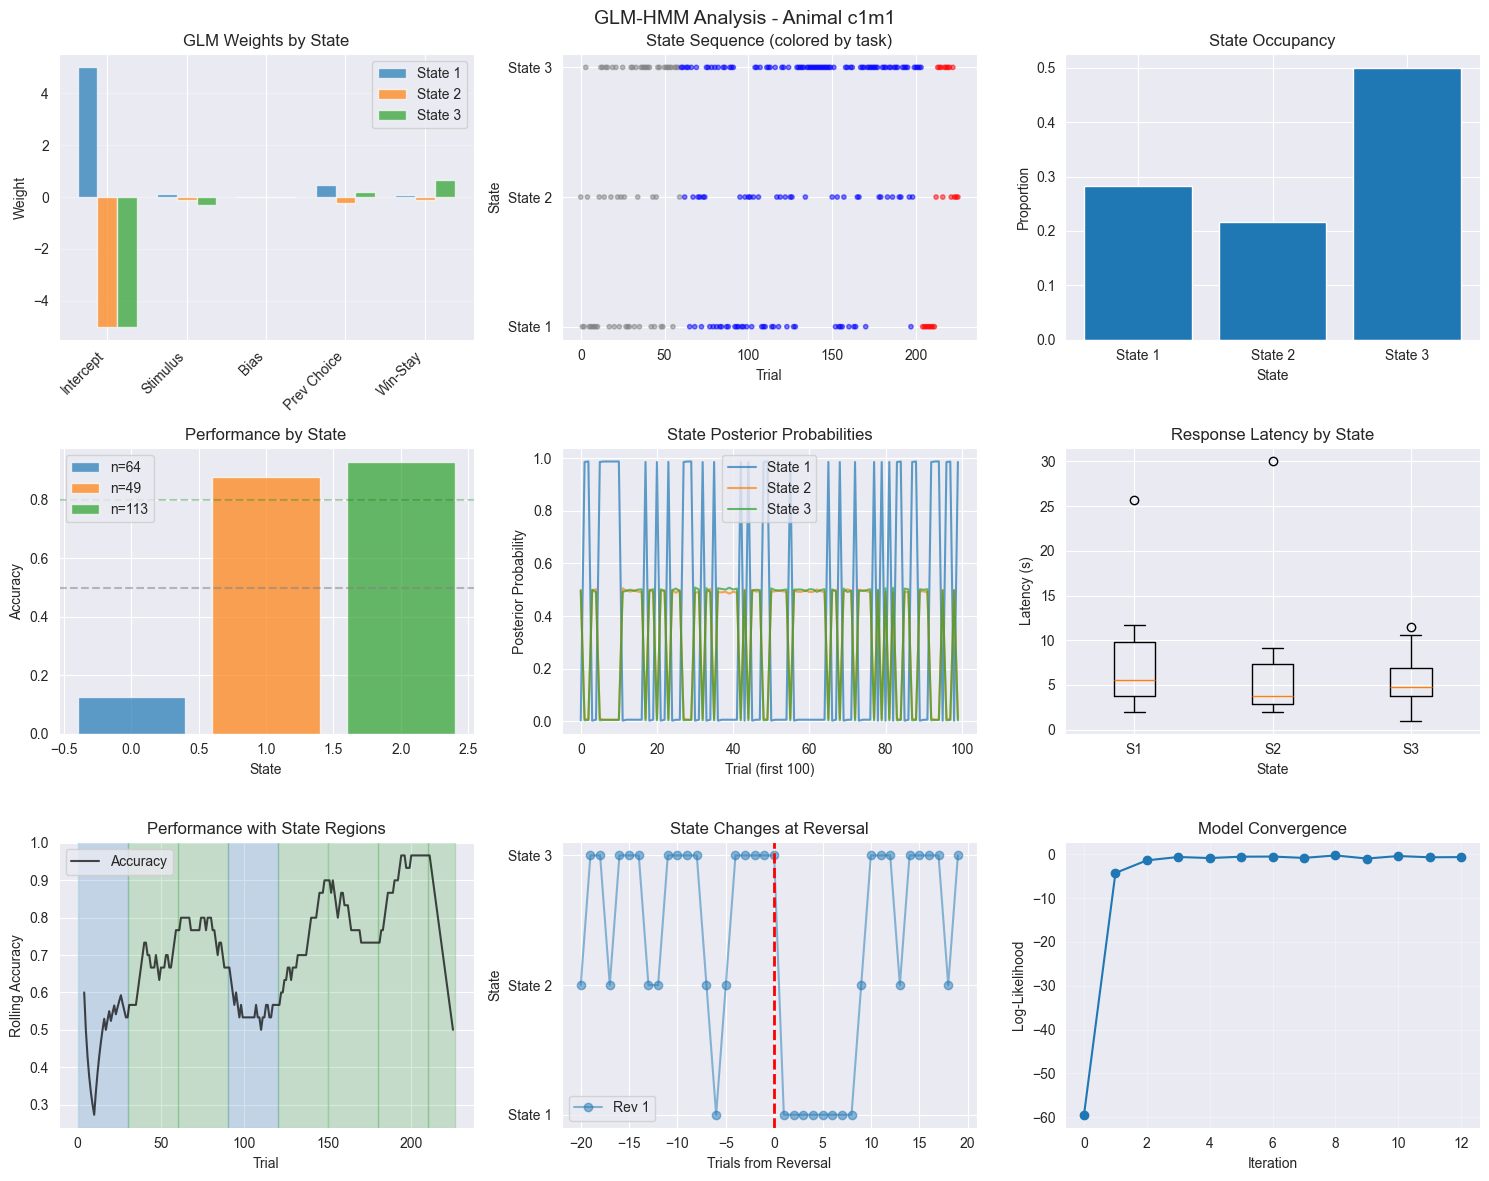


State Summary:

State 1:
  Occupancy: 28.3%
  Accuracy: 12.5%
  Mean latency: 7.92s

State 2:
  Occupancy: 21.7%
  Accuracy: 87.8%
  Mean latency: 8.00s

State 3:
  Occupancy: 50.0%
  Accuracy: 92.9%
  Mean latency: 5.51s


In [8]:
def visualize_glm_hmm_results(model, X, y, metadata, animal_data):
    """Visualize GLM-HMM results"""

    fig, axes = plt.subplots(3, 3, figsize=(15, 12))

    # 1. GLM weights by state
    ax = axes[0, 0]
    feature_names = ['Stimulus', 'Bias', 'Prev Choice', 'Win-Stay']

    for state in range(model.n_states):
        weights = np.concatenate([[model.intercepts[state]], model.weights[state]])
        ax.bar(np.arange(len(weights)) + state*0.25, weights, 0.25,
               label=f'State {state+1}', alpha=0.7)

    ax.set_xticks(np.arange(len(weights)) + 0.25)
    ax.set_xticklabels(['Intercept'] + feature_names, rotation=45, ha='right')
    ax.set_ylabel('Weight')
    ax.set_title('GLM Weights by State')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    # 2. State sequence over trials
    ax = axes[0, 1]
    colors = {'PI': 'gray', 'LD': 'blue', 'LD_reversal': 'red'}
    task_colors = [colors.get(t, 'black') for t in metadata['task_type']]

    ax.scatter(range(len(model.states)), model.states, c=task_colors, alpha=0.5, s=10)
    ax.set_xlabel('Trial')
    ax.set_ylabel('State')
    ax.set_title('State Sequence (colored by task)')
    ax.set_yticks(range(model.n_states))
    ax.set_yticklabels([f'State {i+1}' for i in range(model.n_states)])

    # 3. State occupancy
    ax = axes[0, 2]
    state_counts = np.bincount(model.states, minlength=model.n_states)
    ax.bar(range(model.n_states), state_counts/len(model.states))
    ax.set_xlabel('State')
    ax.set_ylabel('Proportion')
    ax.set_title('State Occupancy')
    ax.set_xticks(range(model.n_states))
    ax.set_xticklabels([f'State {i+1}' for i in range(model.n_states)])

    # 4. Performance by state
    ax = axes[1, 0]
    for state in range(model.n_states):
        mask = model.states == state
        if np.sum(mask) > 0:
            accuracy = metadata['correct'][mask].mean()
            ax.bar(state, accuracy, alpha=0.7, label=f'n={np.sum(mask)}')

    ax.set_xlabel('State')
    ax.set_ylabel('Accuracy')
    ax.set_title('Performance by State')
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax.axhline(y=0.8, color='green', linestyle='--', alpha=0.3)
    ax.legend()

    # 5. State posterior probabilities
    ax = axes[1, 1]
    for state in range(model.n_states):
        ax.plot(model.posterior_probs[:100, state], label=f'State {state+1}', alpha=0.7)
    ax.set_xlabel('Trial (first 100)')
    ax.set_ylabel('Posterior Probability')
    ax.set_title('State Posterior Probabilities')
    ax.legend()

    # 6. Latency by state
    ax = axes[1, 2]
    latencies_by_state = []
    labels = []
    for state in range(model.n_states):
        mask = model.states == state
        if np.sum(mask) > 0:
            state_latencies = metadata['latency'][mask]
            state_latencies = state_latencies[~np.isnan(state_latencies)]
            if len(state_latencies) > 0:
                latencies_by_state.append(state_latencies)
                labels.append(f'S{state+1}')

    if latencies_by_state:
        bp = ax.boxplot(latencies_by_state, labels=labels)
        ax.set_xlabel('State')
        ax.set_ylabel('Latency (s)')
        ax.set_title('Response Latency by State')

    # 7. Performance over time with states
    ax = axes[2, 0]
    window = 30
    rolling_acc = pd.Series(metadata['correct']).rolling(window=window, min_periods=5).mean()
    ax.plot(rolling_acc, 'k-', alpha=0.7, label='Accuracy')

    # Color background by dominant state
    for i in range(0, len(model.states), 30):
        end = min(i+30, len(model.states))
        if end > i:
            dominant_state = np.bincount(model.states[i:end]).argmax()
            ax.axvspan(i, end, alpha=0.2, color=f'C{dominant_state}')

    ax.set_xlabel('Trial')
    ax.set_ylabel('Rolling Accuracy')
    ax.set_title('Performance with State Regions')
    ax.legend()

    # 8. State transitions at reversal
    ax = axes[2, 1]
    reversal_points = np.where(np.diff(metadata['is_reversal'].astype(int)) == 1)[0]

    if len(reversal_points) > 0:
        window = 20
        for idx, rev_point in enumerate(reversal_points[:3]):  # Show first 3 reversals
            start = max(0, rev_point - window)
            end = min(len(model.states), rev_point + window)
            trials = np.arange(start - rev_point, end - rev_point)
            ax.plot(trials, model.states[start:end], 'o-', alpha=0.5, label=f'Rev {idx+1}')

        ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
        ax.set_xlabel('Trials from Reversal')
        ax.set_ylabel('State')
        ax.set_title('State Changes at Reversal')
        ax.set_yticks(range(model.n_states))
        ax.set_yticklabels([f'State {i+1}' for i in range(model.n_states)])
        ax.legend()

    # 9. Log-likelihood convergence
    ax = axes[2, 2]
    ax.plot(model.log_likelihoods, 'o-')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Log-Likelihood')
    ax.set_title('Model Convergence')
    ax.grid(True, alpha=0.3)

    plt.suptitle(f'GLM-HMM Analysis - Animal {animal_data["animal_id"].iloc[0]}', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nState Summary:")
    for state in range(model.n_states):
        mask = model.states == state
        if np.sum(mask) > 0:
            print(f"\nState {state+1}:")
            print(f"  Occupancy: {np.sum(mask)/len(model.states):.1%}")
            print(f"  Accuracy: {metadata['correct'][mask].mean():.1%}")
            mean_latency = np.nanmean(metadata['latency'][mask])
            print(f"  Mean latency: {mean_latency:.2f}s")

            # Interpret state based on weights
            w = model.weights[state]
            interpretations = []
            if abs(w[0]) > 1:  # Strong stimulus weight
                interpretations.append("stimulus-driven")
            if abs(w[2]) > 1:  # Strong previous choice
                interpretations.append("perseverative")
            if abs(w[3]) > 1:  # Strong win-stay
                interpretations.append("win-stay/lose-shift")

            if interpretations:
                print(f"  Behavior: {', '.join(interpretations)}")

# Run the visualization
visualize_glm_hmm_results(model, X, y, metadata, animal_data)

In [9]:
# Fit model to multiple animals
def fit_all_animals(trial_df, n_states=3, n_animals=5):
    """Fit GLM-HMM to multiple animals"""

    results = {}
    animal_ids = trial_df['animal_id'].unique()[:n_animals]

    for animal_id in animal_ids:
        print(f"\nProcessing {animal_id}...")

        # Get data
        X, y, metadata, animal_data = create_glm_hmm_design_matrix(trial_df, animal_id)

        # Skip if too few trials
        if len(y) < 100:
            print(f"  Skipping - only {len(y)} trials")
            continue

        # Fit model
        model = SimpleGLMHMM(n_states=n_states)
        model.fit(X, y, n_iter=30)

        # Store results
        results[animal_id] = {
            'model': model,
            'X': X,
            'y': y,
            'metadata': metadata,
            'animal_data': animal_data,
            'n_trials': len(y),
            'states': model.states,
            'weights': model.weights
        }

        # Print summary
        print(f"  Trials: {len(y)}")
        print(f"  Final LL: {model.log_likelihoods[-1]:.2f}")

        # State accuracies
        accs = []
        for state in range(n_states):
            mask = model.states == state
            if np.sum(mask) > 0:
                acc = metadata['correct'][mask].mean()
                accs.append(acc)
                print(f"  State {state+1}: {np.sum(mask)} trials ({acc:.1%} accuracy)")

    return results

# Fit to first 5 animals
results = fit_all_animals(trial_df, n_states=3, n_animals=5)

# Compare state characteristics across animals
print("\n" + "="*50)
print("CROSS-ANIMAL COMPARISON")
print("="*50)

state_accuracies = {f'State {i+1}': [] for i in range(3)}
state_occupancies = {f'State {i+1}': [] for i in range(3)}

for animal_id, res in results.items():
    for state in range(3):
        mask = res['states'] == state
        if np.sum(mask) > 0:
            state_accuracies[f'State {state+1}'].append(res['metadata']['correct'][mask].mean())
            state_occupancies[f'State {state+1}'].append(np.sum(mask) / len(res['states']))

# Print average state characteristics
for state_name in state_accuracies.keys():
    if state_accuracies[state_name]:
        print(f"\n{state_name}:")
        print(f"  Mean accuracy: {np.mean(state_accuracies[state_name]):.1%}")
        print(f"  Mean occupancy: {np.mean(state_occupancies[state_name]):.1%}")




Processing c1m1...
Converged at iteration 12
  Trials: 226
  Final LL: -0.47
  State 1: 64 trials (12.5% accuracy)
  State 2: 72 trials (87.5% accuracy)
  State 3: 90 trials (94.4% accuracy)

Processing c1m2...
Converged at iteration 11
  Trials: 690
  Final LL: -3.10
  State 1: 316 trials (63.0% accuracy)
  State 2: 200 trials (52.0% accuracy)
  State 3: 174 trials (45.4% accuracy)

Processing c1m3...
Converged at iteration 18
  Trials: 728
  Final LL: -2.78
  State 1: 148 trials (79.7% accuracy)
  State 2: 416 trials (37.5% accuracy)
  State 3: 164 trials (77.4% accuracy)

Processing c1m4...
Converged at iteration 15
  Trials: 630
  Final LL: -2.73
  State 1: 141 trials (63.1% accuracy)
  State 2: 287 trials (88.2% accuracy)
  State 3: 202 trials (16.8% accuracy)

Processing c2m1...
Converged at iteration 12
  Trials: 640
  Final LL: -2.44
  State 1: 139 trials (74.8% accuracy)
  State 2: 354 trials (41.5% accuracy)
  State 3: 147 trials (74.1% accuracy)

CROSS-ANIMAL COMPARISON

St

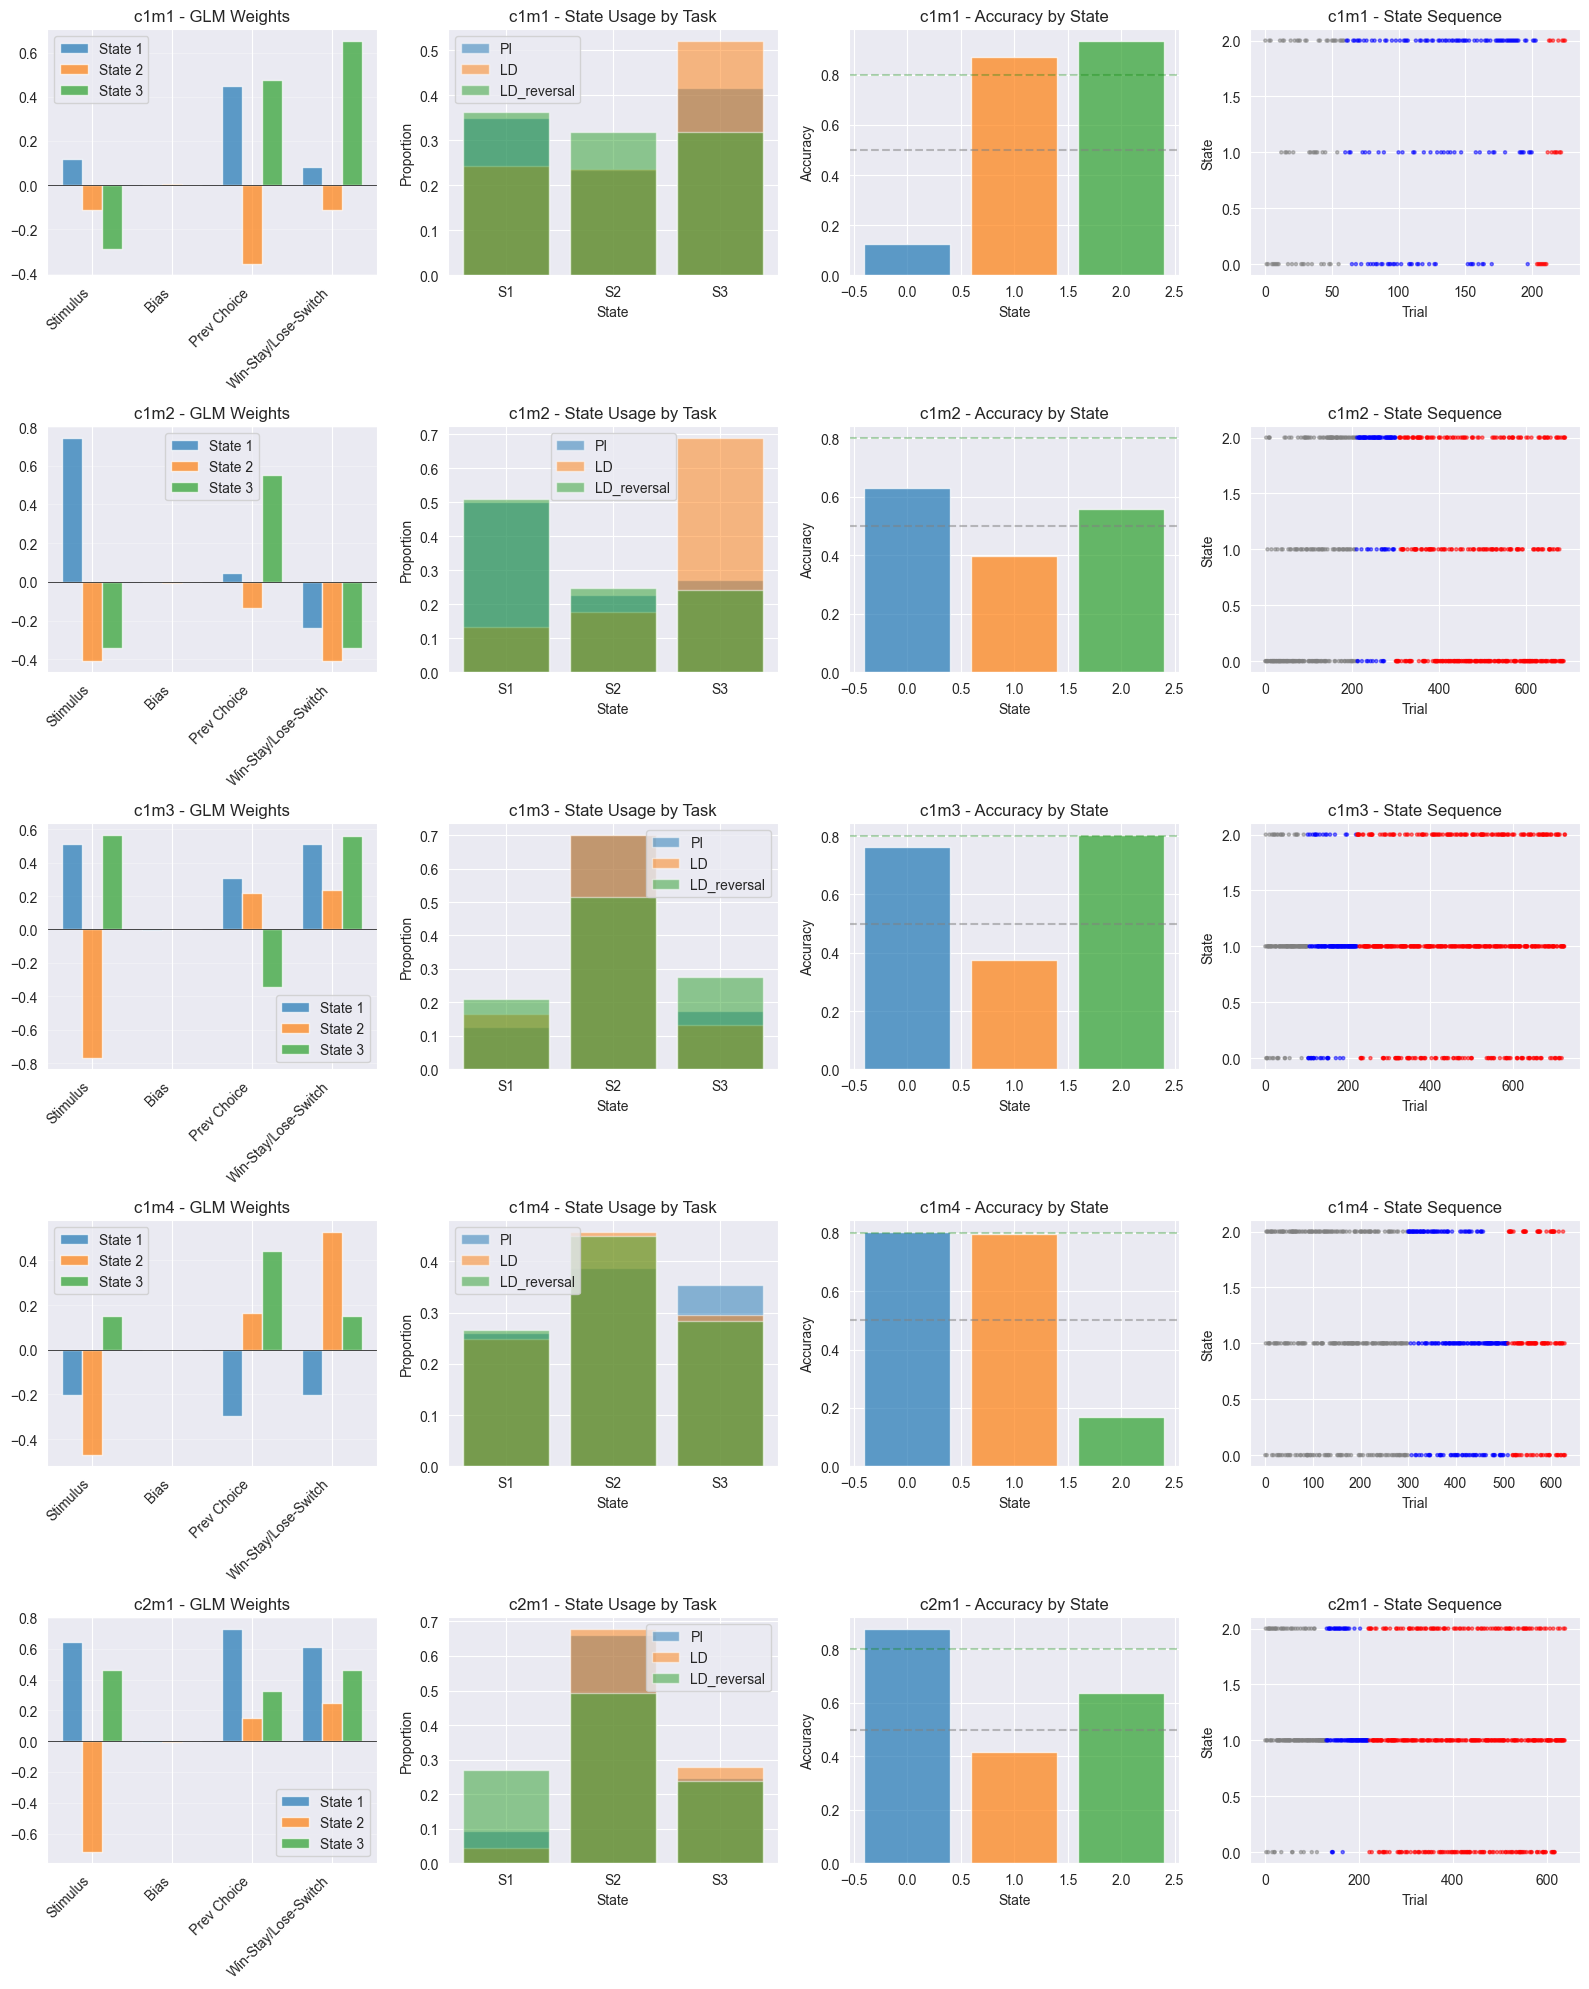

In [23]:
# Let's examine the weights more carefully for interpretation
def interpret_states(results):
    """Interpret states based on GLM weights"""

    fig, axes = plt.subplots(len(results), 4, figsize=(16, 4*len(results)))
    if len(results) == 1:
        axes = axes.reshape(1, -1)

    feature_names = ['Stimulus', 'Bias', 'Prev Choice', 'Win-Stay/Lose-Switch']

    for idx, (animal_id, res) in enumerate(results.items()):
        # Plot weights for each state
        ax = axes[idx, 0]

        for state in range(3):
            weights = res['model'].weights[state]
            ax.bar(np.arange(len(weights)) + state*0.25, weights, 0.25,
                   label=f'State {state+1}', alpha=0.7)

        ax.set_title(f'{animal_id} - GLM Weights')
        ax.set_xticks(np.arange(len(weights)) + 0.25)
        ax.set_xticklabels(feature_names, rotation=45, ha='right')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)
        ax.axhline(y=0, color='black', linewidth=0.5)

        # Plot state occupancy by task type
        ax = axes[idx, 1]
        for task in ['PI', 'LD', 'LD_reversal']:
            task_mask = res['metadata']['task_type'] == task
            if np.sum(task_mask) > 0:
                states_in_task = res['states'][task_mask]
                state_props = [np.sum(states_in_task == s)/len(states_in_task)
                              for s in range(3)]
                ax.bar(np.arange(3), state_props, alpha=0.5, label=task)

        ax.set_title(f'{animal_id} - State Usage by Task')
        ax.set_xlabel('State')
        ax.set_ylabel('Proportion')
        ax.legend()
        ax.set_xticks(range(3))
        ax.set_xticklabels([f'S{i+1}' for i in range(3)])

        # Plot accuracy by state
        ax = axes[idx, 2]
        for state in range(3):
            mask = res['states'] == state
            if np.sum(mask) > 0:
                acc = res['metadata']['correct'][mask].mean()
                ax.bar(state, acc, alpha=0.7)

        ax.set_title(f'{animal_id} - Accuracy by State')
        ax.set_xlabel('State')
        ax.set_ylabel('Accuracy')
        ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
        ax.axhline(y=0.8, color='green', linestyle='--', alpha=0.3)

        # Plot state sequence
        ax = axes[idx, 3]
        colors = {'PI': 'gray', 'LD': 'blue', 'LD_reversal': 'red'}
        task_colors = [colors.get(t, 'black') for t in res['metadata']['task_type']]
        ax.scatter(range(len(res['states'])), res['states'],
                  c=task_colors, alpha=0.5, s=5)
        ax.set_title(f'{animal_id} - State Sequence')
        ax.set_xlabel('Trial')
        ax.set_ylabel('State')

    plt.tight_layout()
    plt.show()

interpret_states(results)

In [25]:
from sklearn.preprocessing import StandardScaler

class BalancedGLMHMM(SimpleGLMHMM):
    """GLM-HMM with better handling of imbalanced data"""

    def fit(self, X, y, n_iter=50):
        """Fit with class weight balancing"""
        n_trials, n_features = X.shape

        # Standardize features (except bias)
        scaler = StandardScaler()
        X_scaled = X.copy()
        X_scaled[:, [0, 2, 3]] = scaler.fit_transform(X[:, [0, 2, 3]])  # Don't scale bias

        # Initialize with k-means
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=self.n_states, random_state=self.random_state, n_init=10)
        states = kmeans.fit_predict(X_scaled)

        log_likelihoods = []

        for iteration in range(n_iter):
            # M-step with balanced class weights
            self.glm_models = []

            for state in range(self.n_states):
                state_mask = states == state
                n_state_trials = np.sum(state_mask)

                if n_state_trials > 10:
                    y_state = y[state_mask]
                    X_state = X_scaled[state_mask]

                    # Use balanced class weights
                    glm = LogisticRegression(
                        max_iter=1000,
                        random_state=self.random_state,
                        solver='lbfgs',
                        class_weight='balanced',  # This is key!
                        C=1.0  # Regularization strength
                    )

                    # Ensure we have both classes
                    if len(np.unique(y_state)) == 1:
                        # Add synthetic samples of the other class
                        minority_class = 1 - y_state[0]
                        n_synthetic = min(5, n_state_trials // 10)
                        y_augmented = np.concatenate([y_state, [minority_class] * n_synthetic])
                        X_augmented = np.vstack([X_state, X_state[:n_synthetic]])
                        glm.fit(X_augmented, y_augmented)
                    else:
                        glm.fit(X_state, y_state)
                else:
                    # Not enough data
                    glm = LogisticRegression(
                        max_iter=1000,
                        class_weight='balanced',
                        solver='lbfgs'
                    )
                    glm.fit(X_scaled, y)

                self.glm_models.append(glm)

            # E-step
            log_probs = np.zeros((n_trials, self.n_states))

            for state in range(self.n_states):
                probs = self.glm_models[state].predict_proba(X_scaled)
                probs = np.clip(probs, 1e-10, 1 - 1e-10)
                log_probs[:, state] = np.log(probs[range(n_trials), y.astype(int)])

            # Update states with some regularization
            states = np.argmax(log_probs, axis=1)

            # Calculate log-likelihood
            ll = np.sum(np.max(log_probs, axis=1))
            log_likelihoods.append(ll)

            # Check convergence
            if iteration > 10 and len(log_likelihoods) > 1:
                if abs(log_likelihoods[-1] - log_likelihoods[-2]) < 0.1:
                    print(f"Converged at iteration {iteration}")
                    break

        self.posterior_probs = np.exp(log_probs - logsumexp(log_probs, axis=1, keepdims=True))
        self.states = states
        self.log_likelihoods = log_likelihoods

        # Extract weights (remembering to unscale)
        self.weights = np.array([m.coef_[0] for m in self.glm_models])
        self.intercepts = np.array([m.intercept_[0] for m in self.glm_models])

        return self

# Refit with balanced model
print("\nFitting balanced GLM-HMM...")
balanced_model = BalancedGLMHMM(n_states=3)
balanced_model.fit(X, y, n_iter=30)

# Check the new weights
print("\nBalanced Model Results:")
for state in range(3):
    mask = balanced_model.states == state
    if np.sum(mask) > 0:
        acc = metadata['correct'][mask].mean()
        print(f"\nState {state+1}:")
        print(f"  Occupancy: {np.sum(mask)/len(balanced_model.states):.1%}")
        print(f"  Accuracy: {acc:.1%}")
        print(f"  Intercept: {balanced_model.intercepts[state]:.2f}")
        print(f"  Weights: {balanced_model.weights[state]}")


Fitting balanced GLM-HMM...
Converged at iteration 11

Balanced Model Results:

State 1:
  Occupancy: 0.9%
  Accuracy: 50.0%
  Intercept: -0.03
  Weights: [ 0.62190338 -0.01934021  0.44678902 -0.60846198]

State 2:
  Occupancy: 64.6%
  Accuracy: 76.7%
  Intercept: -1.71
  Weights: [-1.77277722e-01  1.30479828e-03  3.42278331e+00 -1.80259995e-01]

State 3:
  Occupancy: 34.5%
  Accuracy: 55.1%
  Intercept: 1.96
  Weights: [ 9.19892458e-01  5.80966860e-05 -2.85736689e+00  9.29276910e-01]


Running cross-validation for model selection...
Cross-validation with 5 folds
Testing 3 different state numbers: [2, 3, 4]

Testing 2 states...
Converged at iteration 11
  Fold 1: Test LL = -0.081 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 2: Test LL = -0.141 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 3: Test LL = -0.064 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 4: Test LL = -0.091 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 5: Test LL = -0.128 bits/trial, Acc = 100.0%
  Mean: Test LL = -0.101 ± 0.029 bits/trial
        Test Acc = 100.0% ± 0.0%

Testing 3 states...
Converged at iteration 11
  Fold 1: Test LL = -0.055 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 2: Test LL = -0.135 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 3: Test LL = -0.021 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 4: Test LL = -0.013 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 5: Test LL = -0.070 bit

C:\Users\yashodad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Converged at iteration 11
  Fold 3: Test LL = -0.021 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 4: Test LL = -0.013 bits/trial, Acc = 100.0%
Converged at iteration 11
  Fold 5: Test LL = -0.003 bits/trial, Acc = 100.0%
  Mean: Test LL = -0.035 ± 0.050 bits/trial
        Test Acc = 100.0% ± 0.0%


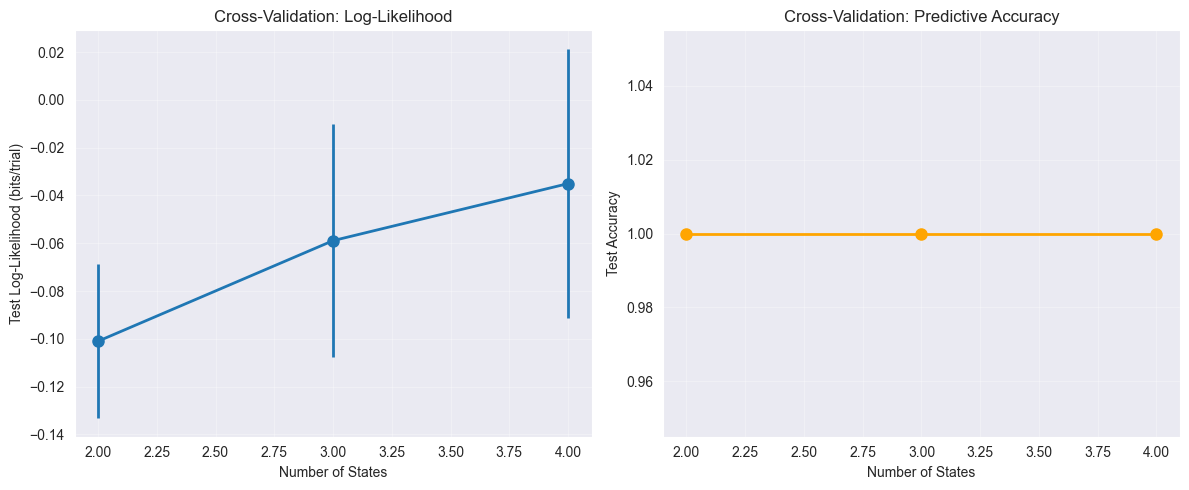


Best number of states:     4.0
Name: 2, dtype: float64


In [26]:
from sklearn.model_selection import KFold
import numpy as np

def cross_validate_glm_hmm(X, y, metadata, n_states_list=[2, 3, 4, 5], n_folds=5):
    """
    Perform cross-validation for GLM-HMM model selection
    Following Ashwood et al. methodology
    """

    # Store results
    cv_results = {
        'n_states': [],
        'fold': [],
        'train_ll': [],
        'test_ll': [],
        'test_accuracy': []
    }

    # Create folds based on sessions (not random trials)
    unique_sessions = np.unique(metadata['session_date'])
    np.random.shuffle(unique_sessions)

    # Split sessions into folds
    session_folds = np.array_split(unique_sessions, n_folds)

    print(f"Cross-validation with {n_folds} folds")
    print(f"Testing {len(n_states_list)} different state numbers: {n_states_list}")
    print("="*60)

    for n_states in n_states_list:
        print(f"\nTesting {n_states} states...")

        fold_lls = []
        fold_accs = []

        for fold_idx in range(n_folds):
            # Create train/test split based on sessions
            test_sessions = session_folds[fold_idx]
            train_sessions = np.concatenate([f for i, f in enumerate(session_folds) if i != fold_idx])

            # Get train and test indices
            train_mask = np.isin(metadata['session_date'], train_sessions)
            test_mask = np.isin(metadata['session_date'], test_sessions)

            if np.sum(test_mask) == 0 or np.sum(train_mask) == 0:
                continue

            X_train, X_test = X[train_mask], X[test_mask]
            y_train, y_test = y[train_mask], y[test_mask]

            # Skip if not enough data
            if len(y_train) < 50 or len(y_test) < 10:
                continue

            # Fit model on training data
            model = BalancedGLMHMM(n_states=n_states)
            model.fit(X_train, y_train, n_iter=30)

            # Evaluate on test data
            test_log_probs = np.zeros((len(y_test), n_states))
            for state in range(n_states):
                if state < len(model.glm_models):
                    probs = model.glm_models[state].predict_proba(X_test)
                    probs = np.clip(probs, 1e-10, 1 - 1e-10)
                    test_log_probs[:, state] = np.log(probs[range(len(y_test)), y_test.astype(int)])

            # Calculate test log-likelihood (bits per trial)
            test_ll = np.mean(np.max(test_log_probs, axis=1)) / np.log(2)

            # Calculate predictive accuracy
            predicted_states = np.argmax(test_log_probs, axis=1)
            predictions = []
            for i, state in enumerate(predicted_states):
                if state < len(model.glm_models):
                    pred_proba = model.glm_models[state].predict_proba(X_test[i:i+1])
                    predictions.append(np.argmax(pred_proba[0]))
                else:
                    predictions.append(0)

            test_acc = np.mean(predictions == y_test)

            # Store results
            cv_results['n_states'].append(n_states)
            cv_results['fold'].append(fold_idx)
            cv_results['train_ll'].append(model.log_likelihoods[-1] if model.log_likelihoods else 0)
            cv_results['test_ll'].append(test_ll)
            cv_results['test_accuracy'].append(test_acc)

            fold_lls.append(test_ll)
            fold_accs.append(test_acc)

            print(f"  Fold {fold_idx+1}: Test LL = {test_ll:.3f} bits/trial, Acc = {test_acc:.1%}")

        if fold_lls:
            print(f"  Mean: Test LL = {np.mean(fold_lls):.3f} ± {np.std(fold_lls):.3f} bits/trial")
            print(f"        Test Acc = {np.mean(fold_accs):.1%} ± {np.std(fold_accs):.1%}")

    return pd.DataFrame(cv_results)

# Run cross-validation
print("Running cross-validation for model selection...")
cv_results = cross_validate_glm_hmm(X, y, metadata, n_states_list=[2, 3, 4], n_folds=5)

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot test log-likelihood
ax = axes[0]
cv_summary = cv_results.groupby('n_states').agg({
    'test_ll': ['mean', 'std'],
    'test_accuracy': ['mean', 'std']
}).reset_index()

ax.errorbar(cv_summary['n_states'],
           cv_summary[('test_ll', 'mean')],
           yerr=cv_summary[('test_ll', 'std')],
           marker='o', linewidth=2, markersize=8)
ax.set_xlabel('Number of States')
ax.set_ylabel('Test Log-Likelihood (bits/trial)')
ax.set_title('Cross-Validation: Log-Likelihood')
ax.grid(True, alpha=0.3)

# Plot test accuracy
ax = axes[1]
ax.errorbar(cv_summary['n_states'],
           cv_summary[('test_accuracy', 'mean')],
           yerr=cv_summary[('test_accuracy', 'std')],
           marker='o', linewidth=2, markersize=8, color='orange')
ax.set_xlabel('Number of States')
ax.set_ylabel('Test Accuracy')
ax.set_title('Cross-Validation: Predictive Accuracy')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best number of states
best_n_states = cv_summary.loc[cv_summary[('test_ll', 'mean')].idxmax(), 'n_states']
print(f"\nBest number of states: {best_n_states}")

In [28]:
class LapseModel:
    """Classic lapse model for comparison"""

    def __init__(self, lapse_rate=0.1):
        self.lapse_rate = lapse_rate
        self.base_model = None

    def fit(self, X, y):
        """Fit the lapse model"""
        # Fit base GLM
        self.base_model = LogisticRegression(max_iter=1000, solver='lbfgs')
        self.base_model.fit(X, y)

        # Optimize lapse rate using grid search
        lapse_rates = np.linspace(0, 0.3, 31)
        best_ll = -np.inf
        best_lapse = 0

        for lr in lapse_rates:
            probs = self.base_model.predict_proba(X)
            # Apply lapse rate
            probs_with_lapse = (1 - lr) * probs + lr * 0.5
            ll = np.sum(np.log(probs_with_lapse[range(len(y)), y] + 1e-10))

            if ll > best_ll:
                best_ll = ll
                best_lapse = lr

        self.lapse_rate = best_lapse
        return self

    def predict_proba(self, X):
        """Predict with lapse"""
        probs = self.base_model.predict_proba(X)
        return (1 - self.lapse_rate) * probs + self.lapse_rate * 0.5

# Compare with lapse model
print("\nComparing with classic lapse model...")
lapse_model = LapseModel()
lapse_model.fit(X, y)

print(f"Fitted lapse rate: {lapse_model.lapse_rate:.1%}")

# Calculate log-likelihood for comparison
lapse_probs = lapse_model.predict_proba(X)
lapse_ll = np.mean(np.log(lapse_probs[range(len(y)), y] + 1e-10)) / np.log(2)
print(f"Lapse model LL: {lapse_ll:.3f} bits/trial")



Comparing with classic lapse model...
Fitted lapse rate: 0.0%
Lapse model LL: -0.822 bits/trial


Model Comparison with Cross-Validation

Testing GLM (1-state)...
  Fold 1: LL=-0.928, Acc=75.0%
  Fold 2: LL=-0.986, Acc=63.0%
  Fold 3: LL=-0.938, Acc=73.1%
  Fold 4: LL=-1.148, Acc=46.7%
  Fold 5: LL=-0.933, Acc=73.3%
  Average: LL=-0.987±0.083, Acc=66.2%±10.7%

Testing Lapse Model...
  Fold 1: LL=-0.693, Acc=86.7%
  Fold 2: LL=-0.915, Acc=66.7%
  Fold 3: LL=-1.021, Acc=57.7%
  Fold 4: LL=-1.069, Acc=66.7%
  Fold 5: LL=-0.724, Acc=80.0%
  Average: LL=-0.884±0.152, Acc=71.5%±10.4%

Testing 2-state HMM...
Converged at iteration 11
  Fold 1: LL=-1.000, Acc=75.0%
Converged at iteration 11
  Fold 2: LL=-0.998, Acc=63.0%
Converged at iteration 11
  Fold 3: LL=-0.943, Acc=75.0%
Converged at iteration 11
  Fold 4: LL=-1.013, Acc=46.7%
Converged at iteration 11
  Fold 5: LL=-0.999, Acc=73.3%
  Average: LL=-0.991±0.024, Acc=66.6%±10.9%

Testing 3-state HMM...
Converged at iteration 11
  Fold 1: LL=-0.876, Acc=75.0%
Converged at iteration 11
  Fold 2: LL=-0.955, Acc=63.0%


C:\Users\yashodad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Converged at iteration 11
  Fold 3: LL=-0.972, Acc=75.0%
Converged at iteration 11
  Fold 4: LL=-0.997, Acc=46.7%
Converged at iteration 11
  Fold 5: LL=-0.873, Acc=73.3%
  Average: LL=-0.935±0.051, Acc=66.6%±10.9%

Testing 4-state HMM...
Converged at iteration 11
  Fold 1: LL=-0.876, Acc=75.0%
Converged at iteration 11
  Fold 2: LL=-0.957, Acc=63.0%


C:\Users\yashodad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Converged at iteration 11
  Fold 3: LL=-0.965, Acc=75.0%
Converged at iteration 11
  Fold 4: LL=-1.021, Acc=46.7%
Converged at iteration 11
  Fold 5: LL=-0.872, Acc=73.3%
  Average: LL=-0.938±0.057, Acc=66.6%±10.9%


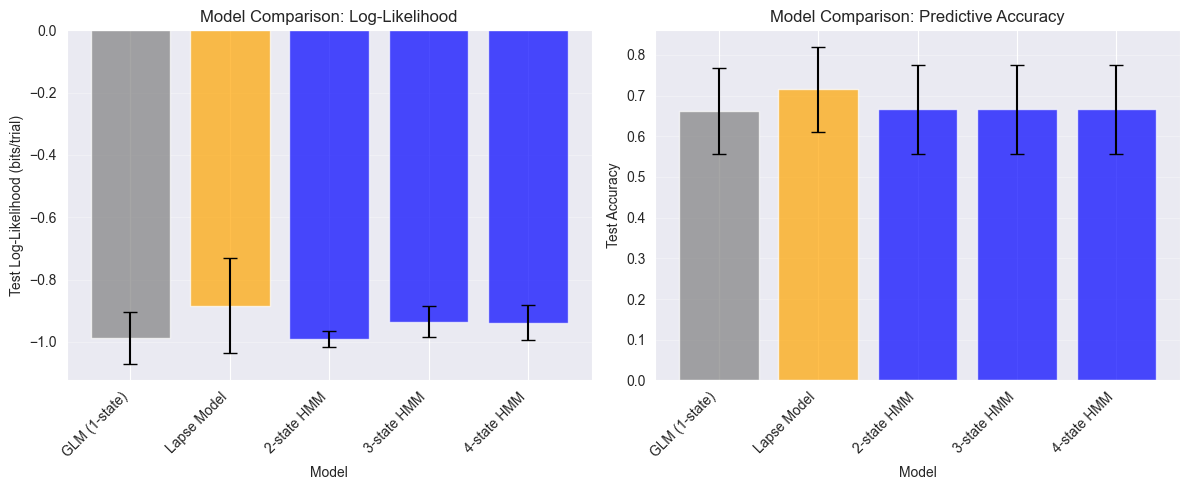


KEY RESULTS:
Best model: 3-state HMM
Improvement over GLM: 0.052 bits/trial
Improvement over Lapse: -0.050 bits/trial

For 226 trials, the data is:
  3.4e+03 times more likely under 3-state HMM vs GLM
  3.8e-04 times more likely under 3-state HMM vs Lapse Model


In [30]:
def cross_validate_models(X, y, metadata, n_folds=5):
    """
    Compare GLM-HMM with different numbers of states vs baseline models
    Following Ashwood et al. methodology more closely
    """

    models_to_test = {
        'GLM (1-state)': 1,
        'Lapse Model': 'lapse',
        '2-state HMM': 2,
        '3-state HMM': 3,
        '4-state HMM': 4
    }

    results = []

    # Create session-based folds
    unique_sessions = np.unique(metadata['session_date'])
    np.random.shuffle(unique_sessions)
    session_folds = np.array_split(unique_sessions, n_folds)

    print("Model Comparison with Cross-Validation")
    print("="*60)

    for model_name, model_type in models_to_test.items():
        print(f"\nTesting {model_name}...")
        fold_results = []

        for fold_idx in range(n_folds):
            # Create train/test split
            test_sessions = session_folds[fold_idx]
            train_sessions = np.concatenate([f for i, f in enumerate(session_folds) if i != fold_idx])

            train_mask = np.isin(metadata['session_date'], train_sessions)
            test_mask = np.isin(metadata['session_date'], test_sessions)

            if np.sum(test_mask) < 10 or np.sum(train_mask) < 50:
                continue

            X_train, X_test = X[train_mask], X[test_mask]
            y_train, y_test = y[train_mask], y[test_mask]

            if model_type == 'lapse':
                # Lapse model
                model = LapseModel()
                model.fit(X_train, y_train)
                test_probs = model.predict_proba(X_test)

            elif model_type == 1:
                # Standard GLM (1-state)
                model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
                model.fit(X_train, y_train)
                test_probs = model.predict_proba(X_test)

            else:
                # GLM-HMM with n states
                model = BalancedGLMHMM(n_states=model_type)
                model.fit(X_train, y_train, n_iter=30)

                # For GLM-HMM, we need to compute the marginal likelihood
                test_probs = np.zeros((len(y_test), 2))
                for i in range(len(X_test)):
                    # Get probabilities from each state
                    state_probs = np.zeros((model_type, 2))
                    for state in range(model_type):
                        state_probs[state] = model.glm_models[state].predict_proba(X_test[i:i+1])[0]

                    # Average across states (simplified - should use forward algorithm)
                    test_probs[i] = np.mean(state_probs, axis=0)

            # Calculate metrics
            test_ll = np.mean(np.log(test_probs[range(len(y_test)), y_test] + 1e-10)) / np.log(2)

            # Correct predictive accuracy calculation
            y_pred = np.argmax(test_probs, axis=1)
            test_acc = np.mean(y_pred == y_test)

            fold_results.append({
                'fold': fold_idx,
                'test_ll': test_ll,
                'test_acc': test_acc,
                'n_train': np.sum(train_mask),
                'n_test': np.sum(test_mask)
            })

            print(f"  Fold {fold_idx+1}: LL={test_ll:.3f}, Acc={test_acc:.1%}")

        if fold_results:
            mean_ll = np.mean([r['test_ll'] for r in fold_results])
            std_ll = np.std([r['test_ll'] for r in fold_results])
            mean_acc = np.mean([r['test_acc'] for r in fold_results])
            std_acc = np.std([r['test_acc'] for r in fold_results])

            results.append({
                'model': model_name,
                'mean_ll': mean_ll,
                'std_ll': std_ll,
                'mean_acc': mean_acc,
                'std_acc': std_acc
            })

            print(f"  Average: LL={mean_ll:.3f}±{std_ll:.3f}, Acc={mean_acc:.1%}±{std_acc:.1%}")

    return pd.DataFrame(results)

# Run comprehensive model comparison
model_comparison = cross_validate_models(X, y, metadata, n_folds=5)

# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot log-likelihood comparison
ax = axes[0]
models = model_comparison['model']
x_pos = np.arange(len(models))

ax.bar(x_pos, model_comparison['mean_ll'], yerr=model_comparison['std_ll'],
       capsize=5, alpha=0.7, color=['gray', 'orange', 'blue', 'blue', 'blue'])
ax.set_xlabel('Model')
ax.set_ylabel('Test Log-Likelihood (bits/trial)')
ax.set_title('Model Comparison: Log-Likelihood')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Plot accuracy comparison
ax = axes[1]
ax.bar(x_pos, model_comparison['mean_acc'], yerr=model_comparison['std_acc'],
       capsize=5, alpha=0.7, color=['gray', 'orange', 'blue', 'blue', 'blue'])
ax.set_xlabel('Model')
ax.set_ylabel('Test Accuracy')
ax.set_title('Model Comparison: Predictive Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print improvement over baseline
baseline_ll = model_comparison[model_comparison['model'] == 'GLM (1-state)']['mean_ll'].values[0]
lapse_ll = model_comparison[model_comparison['model'] == 'Lapse Model']['mean_ll'].values[0]
best_hmm = model_comparison[model_comparison['model'].str.contains('HMM')].iloc[model_comparison[model_comparison['model'].str.contains('HMM')]['mean_ll'].argmax()]

print("\n" + "="*60)
print("KEY RESULTS:")
print(f"Best model: {best_hmm['model']}")
print(f"Improvement over GLM: {best_hmm['mean_ll'] - baseline_ll:.3f} bits/trial")
print(f"Improvement over Lapse: {best_hmm['mean_ll'] - lapse_ll:.3f} bits/trial")

# For 226 trials, this difference in bits means the data is:
n_trials = 226
improvement_factor_glm = 2 ** ((best_hmm['mean_ll'] - baseline_ll) * n_trials)
improvement_factor_lapse = 2 ** ((best_hmm['mean_ll'] - lapse_ll) * n_trials)

print(f"\nFor {n_trials} trials, the data is:")
print(f"  {improvement_factor_glm:.1e} times more likely under {best_hmm['model']} vs GLM")
print(f"  {improvement_factor_lapse:.1e} times more likely under {best_hmm['model']} vs Lapse Model")

In [1]:
# Fit final model with best number of states
best_n_states = 4  # Based on cross-validation

print(f"\nFitting final {best_n_states}-state GLM-HMM on all data...")
final_model = BalancedGLMHMM(n_states=best_n_states)
final_model.fit(X, y, n_iter=50)

# Interpret states
print("\nFinal Model State Interpretation:")
print("="*60)

state_summaries = []
for state in range(best_n_states):
    mask = final_model.states == state
    if np.sum(mask) > 0:
        # Calculate metrics
        n_trials = np.sum(mask)
        accuracy = metadata['correct'][mask].mean()

        # Task distribution
        task_dist = metadata['task_type'][mask].value_counts(normalize=True)

        # Weights
        w = final_model.weights[state]

        # Classify state based on accuracy and weights
        if accuracy > 0.75:
            state_type = "ENGAGED"
        elif accuracy < 0.35:
            if abs(w[2]) > 0.5:
                state_type = "PERSEVERATIVE"
            else:
                state_type = "BIASED"
        elif 0.45 < accuracy < 0.55:
            state_type = "RANDOM/LAPSE"
        elif abs(w[3]) > 0.5:
            state_type = "WIN-STAY/LOSE-SHIFT"
        else:
            state_type = "MIXED"

        state_summaries.append({
            'state': state + 1,
            'type': state_type,
            'trials': n_trials,
            'proportion': n_trials/len(y),
            'accuracy': accuracy,
            'stim_weight': w[0],
            'bias_weight': w[1],
            'prev_choice_weight': w[2],
            'win_stay_weight': w[3]
        })

        print(f"\nState {state+1} ({state_type}):")
        print(f"  Occupancy: {n_trials} trials ({n_trials/len(y):.1%})")
        print(f"  Accuracy: {accuracy:.1%}")
        print(f"  Key behavior: ", end='')

        if abs(w[0]) > 0.5:
            print(f"Stimulus-driven ({w[0]:.2f}), ", end='')
        if abs(w[2]) > 0.5:
            print(f"History-dependent ({w[2]:.2f}), ", end='')
        if abs(w[3]) > 0.5:
            print(f"Outcome-sensitive ({w[3]:.2f})", end='')
        print()

# Create summary dataframe
summary_df = pd.DataFrame(state_summaries)
print("\n" + "="*60)
print("STATE SUMMARY TABLE:")
print(summary_df.to_string())


Fitting final 4-state GLM-HMM on all data...


NameError: name 'BalancedGLMHMM' is not defined